___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

<h1 style="text-align: center;">Deep Learning<br><br>Assignment-2 (CNN)<br><br>Image Classification with CNN<br><h1>

# Task and Dataset Info

Welcome to second assignment of Deep learning lesson. Follow the instructions and complete the assignment.

**Build an image classifier with Convolutional Neural Networks for the Fashion MNIST dataset. This data set includes 10 labels of different clothing types with 28 by 28 *grayscale* images. There is a training set of 60,000 images and 10,000 test images.**

    Label	Description
    0	    T-shirt/top
    1	    Trouser
    2	    Pullover
    3	    Dress
    4	    Coat
    5	    Sandal
    6	    Shirt
    7	    Sneaker
    8	    Bag
    9	    Ankle boot

# Import Libraries

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (10,6)

sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Set it None to display all rows in the dataframe
# pd.set_option('display.max_rows', None)

# Set it to None to display all columns in the dataframe
pd.set_option('display.max_columns', None)

In [1]:
import tensorflow as tf

tf.config.list_physical_devices("GPU")

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

# Recognizing and Understanding Data

**TASK 1: Run the code below to download the dataset using Keras.**

In [2]:
from tensorflow.keras.datasets import fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [5]:
display(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(60000, 28, 28)

(10000, 28, 28)

(60000,)

(10000,)

**TASK 2: Use matplotlib to view an image from the data set. It can be any image from the data set.**

In [6]:
classes=["T-shirt/top", "Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]

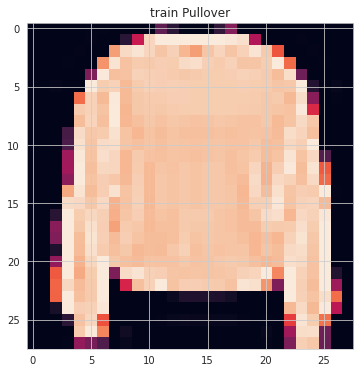

In [13]:
plt.imshow(x_train[7])
plt.title("train "+classes[y_train[7]]);

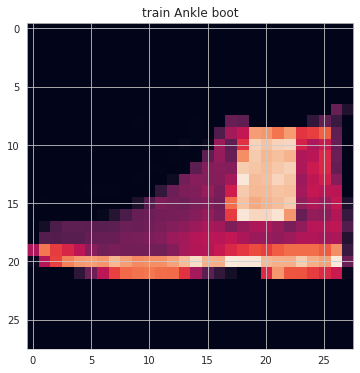

In [15]:
plt.imshow(x_train[111])
plt.title("train "+classes[y_train[111]]);

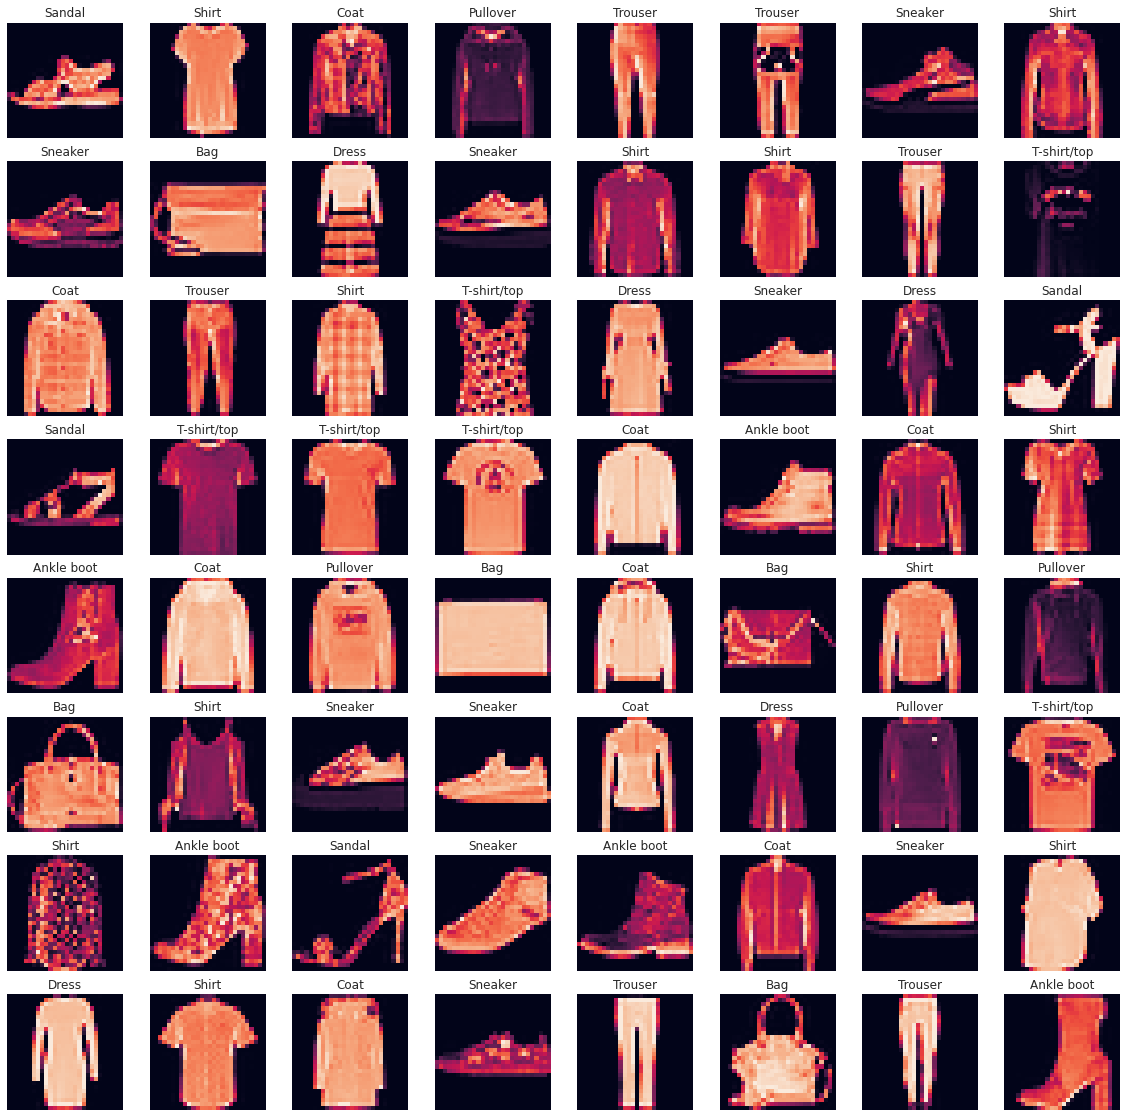

In [18]:
plt.figure(figsize=(20, 20))
for i in range(64):
    rand_index = int(np.random.randint(low=0, high=50000, size=1))
    plt.subplot(8, 8, i+1)
    plt.axis('off')
    plt.title(classes[int(y_train[rand_index])])
    plt.imshow(x_train[rand_index])

# Data Preprocessing

**TASK 3: Normalize the X train and X test data by dividing by the max value of the image arrays.**

In [17]:
x_train.max()

255

In [20]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

**Task 4: Reshape the X arrays to include a 4 dimension of the single channel. Similar to what we did for the numbers MNIST data set.**

In [22]:
display(x_train.shape, x_test.shape)

(60000, 28, 28)

(10000, 28, 28)

In [25]:
X_train = x_train.reshape(x_train.shape[0],28, 28, 1) 
X_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

**TASK 5: Convert the y_train and y_test values to be one-hot encoded for categorical analysis by Keras.**

In [24]:
from tensorflow.keras.utils import to_categorical

In [26]:
Y_train = to_categorical(y_train,10) 
Y_test = to_categorical(y_test,10)

In [30]:
Y_train.shape, Y_test.shape

((60000, 10), (10000, 10))

# Modeling

## Create the model

**TASK 5: Use Keras to create a model consisting of at least the following layers (but feel free to experiment):**

* 2D Convolutional Layer, filters=28 and kernel_size=(3,3)
* Pooling Layer where pool_size = (2,2) strides=(1,1)

* Flatten Layer
* Dense Layer (128 Neurons, but feel free to play around with this value), RELU activation

* Final Dense Layer of 10 Neurons with a softmax activation

**Then compile the model with these parameters: loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy']**

In [31]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout

In [37]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3,3), input_shape=(28, 28, 1), activation='relu', padding='same'))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding='same'))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [38]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 3136)              0         
                                                                 
 dense_3 (Dense)             (None, 128)              

##  Model Training 

**TASK 6: Train/Fit the model to the x_train set by using EarlyStop. Amount of epochs is up to you.**

In [34]:
from tensorflow.keras.callbacks import EarlyStopping

In [35]:
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights = True)

In [39]:
model.fit(X_train, Y_train, batch_size=32, epochs=50, validation_data=(X_test,Y_test),callbacks=[early_stop])

Epoch 1/50
1875/1875 [==============================] - 20s 4ms/step - loss: 0.4078 - accuracy: 0.8525 - val_loss: 0.2962 - val_accuracy: 0.8917
Epoch 2/50
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2666 - accuracy: 0.9030 - val_loss: 0.3034 - val_accuracy: 0.8936
Epoch 3/50
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2300 - accuracy: 0.9175 - val_loss: 0.2572 - val_accuracy: 0.9091
Epoch 4/50
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2096 - accuracy: 0.9247 - val_loss: 0.2711 - val_accuracy: 0.9009
Epoch 5/50
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2027 - accuracy: 0.9277 - val_loss: 0.2798 - val_accuracy: 0.9081
Epoch 6/50
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1911 - accuracy: 0.9323 - val_loss: 0.2869 - val_accuracy: 0.9060


**TASK 7: Plot values of metrics you used in your model.**

In [40]:
summary = pd.DataFrame(model.history.history)
summary.head()

,loss,accuracy,val_loss,val_accuracy
0,0.408,0.852,0.296,0.892
1,0.267,0.903,0.303,0.894
2,0.230,0.918,0.257,0.909
3,0.210,0.925,0.271,0.901
4,0.203,0.928,0.280,0.908


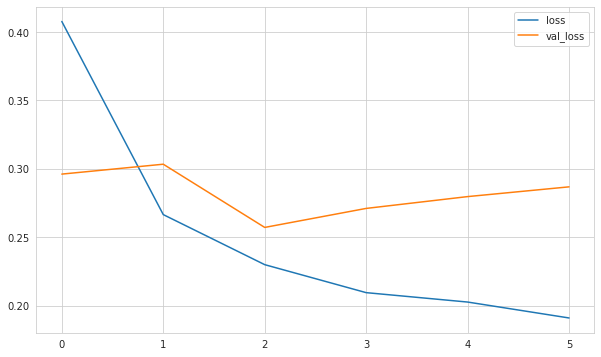

In [41]:
summary[["loss", "val_loss"]].plot();

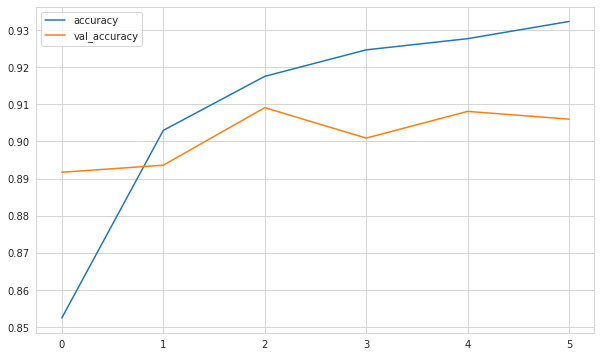

In [42]:
summary[["accuracy", "val_accuracy"]].plot();

**The model goes to overfitting but earlystopping stopped model in epoch 5**

## Model Evaluation

**TASK 8: Show the accuracy,precision,recall,f1-score the model achieved on the x_test data set. Keep in mind, there are quite a few ways to do this, but we recommend following the same procedure we showed in the MNIST lecture.**

In [43]:
from sklearn.metrics import classification_report, confusion_matrix

In [45]:
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.25723639130592346
Test accuracy: 0.9090999960899353


In [46]:
pred_prob = model.predict(X_test)

In [47]:
y_pred = np.argmax(pred_prob, axis=1)

In [48]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.83      0.85      1000
           1       0.99      0.98      0.98      1000
           2       0.84      0.87      0.86      1000
           3       0.90      0.93      0.91      1000
           4       0.85      0.84      0.84      1000
           5       0.98      0.99      0.98      1000
           6       0.74      0.73      0.74      1000
           7       0.97      0.96      0.96      1000
           8       0.99      0.98      0.98      1000
           9       0.97      0.97      0.97      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



In [49]:
print(confusion_matrix(y_test, y_pred))

[[832   1  12  19   6   1 125   0   4   0]
 [  1 980   0  12   2   0   3   0   2   0]
 [ 15   1 874   7  48   0  55   0   0   0]
 [  8   6   5 933  18   0  29   0   1   0]
 [  0   0  83  34 837   0  46   0   0   0]
 [  0   0   0   0   0 987   0  10   0   3]
 [ 89   2  65  33  72   0 735   0   4   0]
 [  0   0   0   0   0  11   0 964   2  23]
 [  2   3   2   3   4   2   3   0 981   0]
 [  0   0   1   0   0   6   1  24   0 968]]


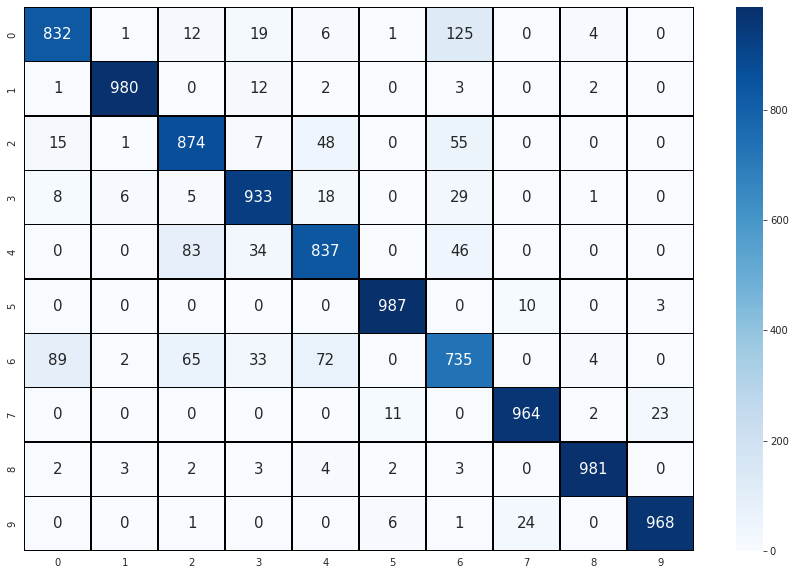

In [50]:
plt.figure(figsize=(15,10))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap="Blues", linewidths=.5, linecolor='black', fmt='g', annot_kws = {"size": 15})

**The main problem for the training is to detect shirts. Model confused shirts with 'T-shirt/top',"Pullover", "Coat".**

In [52]:
classes

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

## Second Model with Drop out and Batch Normalization

In [53]:
from tensorflow.keras.layers import BatchNormalization

In [54]:
model = Sequential()

model.add(Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(28,28,1)))
model.add(BatchNormalization())
model.add(Conv2D(32, (3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.5))

model.add(Conv2D(64, (3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.5))

model.add(Conv2D(128, (3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(128, (3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.5))

model.add(Conv2D(256, (3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(256, (3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.5))


model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [55]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 batch_normalization (BatchN  (None, 28, 28, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_5 (Conv2D)           (None, 28, 28, 32)        9248      
                                                                 
 batch_normalization_1 (Batc  (None, 28, 28, 32)       128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                      

In [56]:
model.fit(X_train, Y_train, batch_size=32, epochs=50, validation_data=(X_test,Y_test), callbacks=[early_stop])

Epoch 1/50
1875/1875 [==============================] - 19s 9ms/step - loss: 0.9620 - accuracy: 0.6644 - val_loss: 0.4636 - val_accuracy: 0.8225
Epoch 2/50
1875/1875 [==============================] - 16s 9ms/step - loss: 0.5444 - accuracy: 0.8122 - val_loss: 0.3945 - val_accuracy: 0.8623
Epoch 3/50
1875/1875 [==============================] - 17s 9ms/step - loss: 0.4485 - accuracy: 0.8520 - val_loss: 0.3262 - val_accuracy: 0.8834
Epoch 4/50
1875/1875 [==============================] - 18s 10ms/step - loss: 0.3989 - accuracy: 0.8686 - val_loss: 0.3044 - val_accuracy: 0.8938
Epoch 5/50
1875/1875 [==============================] - 19s 10ms/step - loss: 0.3654 - accuracy: 0.8799 - val_loss: 0.2730 - val_accuracy: 0.9018
Epoch 6/50
1875/1875 [==============================] - 16s 9ms/step - loss: 0.3463 - accuracy: 0.8862 - val_loss: 0.2722 - val_accuracy: 0.9073
Epoch 7/50
1875/1875 [==============================] - 17s 9ms/step - loss: 0.3237 - accuracy: 0.8932 - val_loss: 0.3034 - val_

In [59]:
summary = pd.DataFrame(model.history.history)
summary.tail(10)

,loss,accuracy,val_loss,val_accuracy
9,0.287,0.904,0.232,0.919
10,0.278,0.909,0.230,0.919
11,0.269,0.911,0.211,0.925
12,0.265,0.912,0.219,0.925
13,0.254,0.916,0.209,0.928
14,0.249,0.919,0.209,0.929
15,0.249,0.918,0.201,0.930
16,0.238,0.922,0.213,0.926
17,0.234,0.921,0.214,0.927
18,0.232,0.923,0.205,0.931


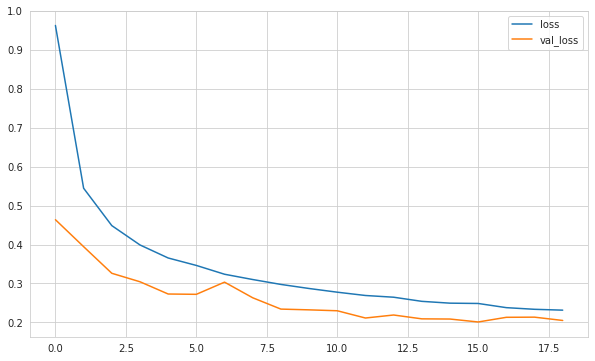

In [60]:
summary[["loss", "val_loss"]].plot();

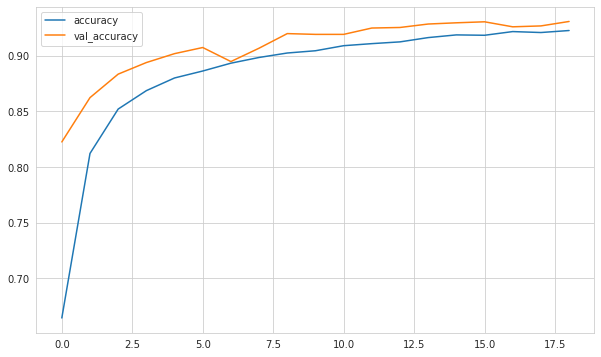

In [61]:
summary[["accuracy", "val_accuracy"]].plot();

**In the second model batch normalization and drop out was used. Besides adam optimiser was used instead of rmsprop. Accurancy scores increase 3% and there was no overfitting in the model.**

## Evaluation of Second Model on Test Data

In [62]:
model.evaluate(X_test, Y_test)

313/313 [==============================] - 2s 7ms/step - loss: 0.2012 - accuracy: 0.9304


[0.20122461020946503, 0.930400013923645]

In [63]:
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.20122461020946503
Test accuracy: 0.930400013923645


In [64]:
pred_prob = model.predict(X_test)

In [65]:
y_pred = np.argmax(pred_prob, axis=1)

In [66]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.89      0.88      1000
           1       1.00      0.98      0.99      1000
           2       0.92      0.89      0.90      1000
           3       0.92      0.94      0.93      1000
           4       0.87      0.92      0.89      1000
           5       0.99      0.98      0.99      1000
           6       0.80      0.77      0.78      1000
           7       0.97      0.97      0.97      1000
           8       0.99      0.99      0.99      1000
           9       0.97      0.98      0.97      1000

    accuracy                           0.93     10000
   macro avg       0.93      0.93      0.93     10000
weighted avg       0.93      0.93      0.93     10000



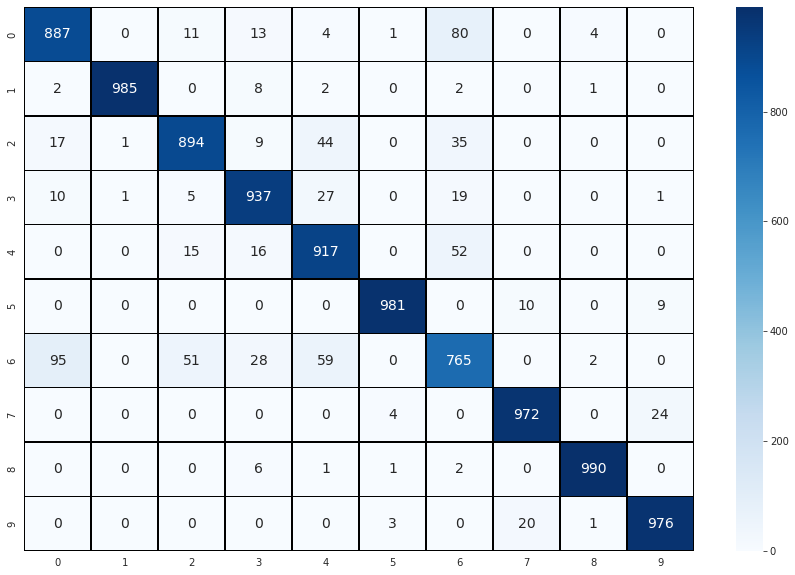

In [67]:
plt.figure(figsize=(15,10))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap="Blues", linewidths=.5, linecolor='black', fmt='g', annot_kws = {"size": 14})

**Scores of "shirt" class still low but higher than first model. (F1 score increased from 0.74 to 0.78) Scores of other classes increased also.** 

## Prediction

In [69]:
my_image = X_test[19]

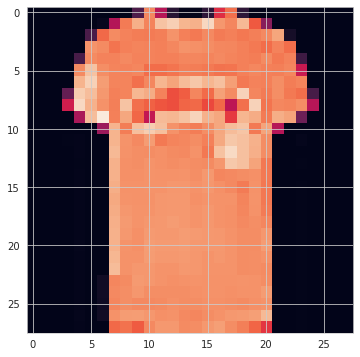

In [76]:
plt.imshow(my_image.reshape(28,28))

In [71]:
image_prediction = model.predict(my_image.reshape(1,28,28,1))

In [72]:
image_prediction

array([[9.9658185e-01, 1.9571208e-07, 1.9052146e-04, 1.5146371e-04,
        2.9404794e-06, 3.9422336e-08, 3.0693174e-03, 2.9225660e-07,
        3.2592716e-06, 3.5694267e-08]], dtype=float32)

In [73]:
result=np.argmax(image_prediction, axis=1)
result

array([0])

In [74]:
classes[int(result)]

'T-shirt/top'

In [77]:
model.save("cnn-fashion.h5")

In [78]:
model=tf.keras.models.load_model('cnn-fashion.h5')

In [79]:
pred=model.predict(np.expand_dims(X_test[115],axis=0))

In [82]:
classes[np.argmax(pred)]

'Pullover'

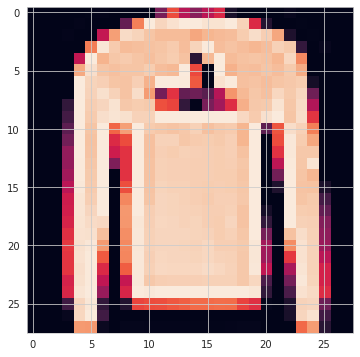

In [81]:
plt.imshow(X_test[115].reshape(28,28))

# End of Assignment

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___